<a href="https://colab.research.google.com/github/Adh101/TechAxis-Data-Science-with-Python-Notes/blob/main/Machine_Learning_for_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Importing Libraries and Loading Data

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
#load the data
df = pd.read_csv("data.csv")

df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


####Data Preparation

In [3]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [4]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [5]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [7]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [8]:
string_columns = list(df.dtypes[df.dtypes == 'object'].index)
string_columns

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [9]:
for col in string_columns:
  df[col] = df[col].str.lower().str.replace(' ','_')

In [10]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


#### Exploratory Data Analysis

In [12]:
df.shape

(11914, 16)

In [13]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [14]:
df.nunique()

make                   48
model                 914
year                   28
engine_fuel_type       10
engine_hp             356
engine_cylinders        9
transmission_type       5
driven_wheels           4
number_of_doors         3
market_category        71
vehicle_size            3
vehicle_style          16
highway_mpg            59
city_mpg               69
popularity             48
msrp                 6049
dtype: int64

In [16]:
for col in df.columns:
  print(col)
  print(df[col].unique()[:5])
  print(df[col].nunique())
  print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

In [17]:
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

<Axes: xlabel='msrp', ylabel='Count'>

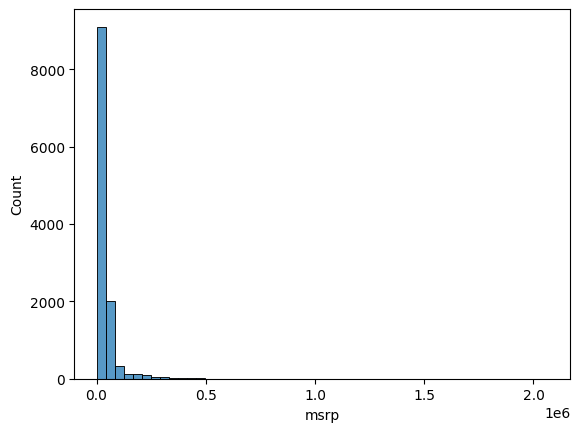

In [18]:
#visualize the distribution of price
sns.histplot(df.msrp, bins = 50)

<Axes: xlabel='msrp', ylabel='Count'>

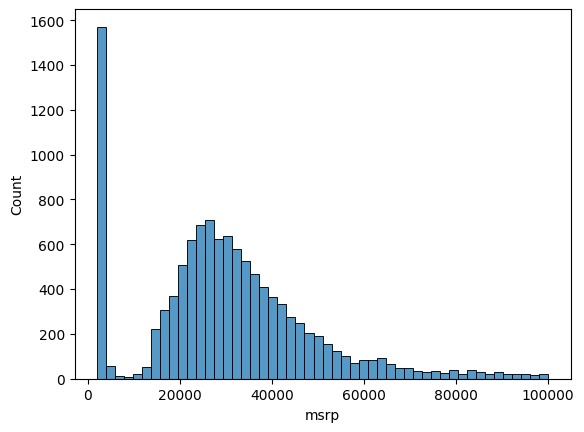

In [19]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

The above values follows long tail distribution.
Here, 1e6 = 10^6

In [20]:
#apply logarithmic transformation to remove the long tail
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

<Axes: xlabel='msrp', ylabel='Count'>

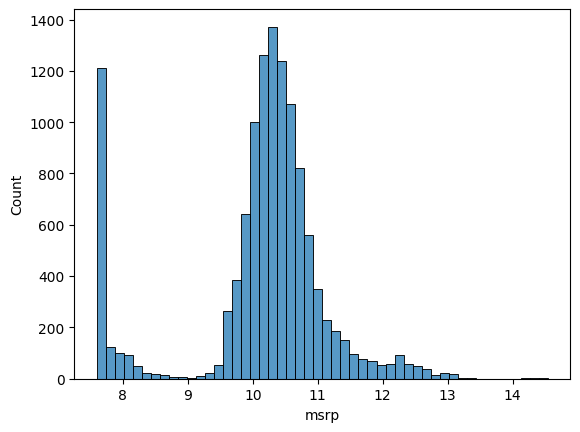

In [21]:
sns.histplot(price_logs, bins = 50)

####Setting up the validation framework

In validation, we split our datasets in three parts, i.e. Training Set, Validation Set and Test Set.

In [22]:
len(df)

11914

In [23]:
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n -(n_val + n_test)

In [24]:
n_val,n_test,n_train

(2382, 2382, 7150)

In [25]:
#split the data
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [26]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
4764,ford,flex,2016,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,37800
4765,ford,flex,2017,premium_unleaded_(recommended),365.0,6.0,automatic,all_wheel_drive,4.0,crossover,large,wagon,21,15,5657,43030
4766,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,all_wheel_drive,4.0,"crossover,performance",large,wagon,22,16,5657,40180
4767,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,32730
4768,ford,flex,2017,regular_unleaded,287.0,6.0,automatic,front_wheel_drive,4.0,"crossover,performance",large,wagon,23,16,5657,38230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,46120
11910,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,56670
11911,acura,zdx,2012,premium_unleaded_(required),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50620
11912,acura,zdx,2013,premium_unleaded_(recommended),300.0,6.0,automatic,all_wheel_drive,4.0,"crossover,hatchback,luxury",midsize,4dr_hatchback,23,16,204,50920


Here is a problem with these sets, as data is not shuffled, same kind of data is in the sets which we do not want for our model.

In [27]:
#shuffling and slitting the data
np.random.seed(2)

idx = np.arange(n)

np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train]
df_val = df_shuffled.iloc[n_train:n_train + n_val]
df_test = df_shuffled.iloc[n_train+n_val:]

In [28]:
df_train

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
2735,chevrolet,cobalt,2008,regular_unleaded,148.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,33,24,1385,14410
6720,toyota,matrix,2012,regular_unleaded,132.0,4.0,automatic,front_wheel_drive,4.0,hatchback,compact,4dr_hatchback,32,25,2031,19685
5878,subaru,impreza,2016,regular_unleaded,148.0,4.0,automatic,all_wheel_drive,4.0,hatchback,compact,4dr_hatchback,37,28,640,19795
11190,volkswagen,vanagon,1991,regular_unleaded,90.0,4.0,manual,rear_wheel_drive,3.0,NaN,large,passenger_minivan,18,16,873,2000
4554,ford,f-150,2017,flex-fuel_(unleaded/e85),385.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,crew_cab_pickup,21,15,5657,56260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
434,bmw,4_series,2015,premium_unleaded_(required),300.0,6.0,automatic,rear_wheel_drive,2.0,"luxury,performance",midsize,convertible,31,20,3916,54900
1902,volkswagen,beetle,2015,premium_unleaded_(recommended),210.0,4.0,automated_manual,front_wheel_drive,2.0,"hatchback,performance",compact,2dr_hatchback,30,24,873,29215
9334,gmc,sierra_1500,2015,flex-fuel_(unleaded/e85),285.0,6.0,automatic,four_wheel_drive,4.0,flex_fuel,large,extended_cab_pickup,22,17,549,34675
5284,rolls-royce,ghost,2014,premium_unleaded_(required),563.0,12.0,automatic,rear_wheel_drive,4.0,"exotic,luxury,performance",large,sedan,21,13,86,303300


In [29]:
#reset the index
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [30]:
#apply log transformation
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [32]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

####Linear Regression

        y = ax + b
        where,
        y = target value,
        x = features,
        a,b = coefficients i.e. slope and intercept

        We need to implement:
        g(X) = y , X is a matrix of features
        g(X) = Xw = y

        To find approx solution:
        XT.Xw = XT.y
        (XT.X)^-1 XT.Xw =  (XT.X)^-1 XT.y
        I.w = (XT.X)^-1 XT.y
        Therefore,
        w = (XT.X)^-1 XT.y

In [33]:
def train_linear_regression(X,y):
  ones = np.ones(X.shape[0]) #create ones matrix
  X = np.column_stack([ones,X]) #adds the bias term(intercept)

  XTX = X.T.dot(X)
  XTX_inv = np.linalg.inv(XTX)
  w = XTX_inv.dot(X.T).dot(y)

  return w[0],w[1:] #intercept and feature coefficients

####Baseline Model

In [34]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [35]:
#create the matrix of features
base = ['engine_hp','engine_cylinders','highway_mpg','city_mpg','popularity']

In [36]:
#prepare data

def prepare_X(df):
  df_num = df[base]
  df_num = df_num.fillna(0)
  X = df_num.values
  return X

In [37]:
X_train = prepare_X(df_train)

In [38]:
w0,w = train_linear_regression(X_train,y_train)

In [39]:
y_pred = w0 + X_train.dot(w)

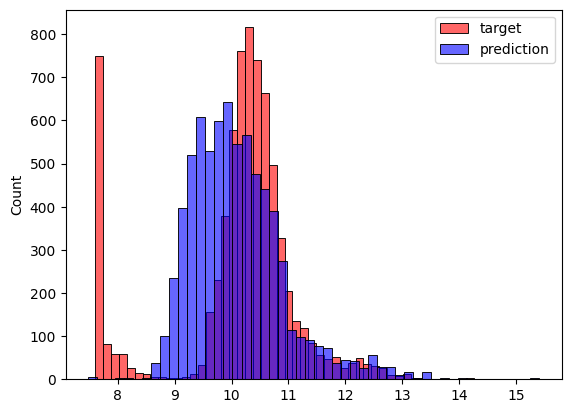

In [43]:
sns.histplot(y_train, label ='target',bins =50,color ='red',alpha = 0.6)
sns.histplot(y_pred, label ='prediction',bins =50,color ='blue', alpha = 0.6)

plt.legend()
plt.show()


####RMSE(Root Mean Squared Error)

MSE = (y_pred - y)**2.mean( )

RMSE = sqrt(MSE)

In [45]:
def rmse(y,y_pred):
  error = y_pred - y
  mse = (error**2).mean()
  rmse = np.sqrt(mse)
  return rmse

In [46]:
rmse(y_train,y_pred)

0.7554192603920132

####Validating the model

In [47]:
X_val = prepare_X(df_val)

w0,w = train_linear_regression(X_train,y_train)

y_pred = w0 + X_val.dot(w)

In [48]:
rmse(y_val,y_pred)

0.761653099130156